# Fake News Datasets

## Introduction
This Jupyter Notebook was created to show basic analysis of public datasets with data for **fake news detection**. Main idea is to make this analysis replicable, so everyone can add his own analysis to those datasets.

## Processed datasets
In this project, following datasets are processed:
* Fake News | Kaggle
* Getting real about Fake News | Kaggle
* Fake News detection | Kaggle
* GeorgeMcIntire/fake_real_news_dataset
* FakeNewsChallenge
* BuzzFeedNews Facebook Facts
* LIAR
* FakeNewsCorpus


## Datasets

### Setup and import libraries

In [138]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

### 1 Fake News | Kaggle
Link: [https://www.kaggle.com/c/fake-news](https://www.kaggle.com/c/fake-news)

**Note:** Repository contains 2 files, **train** and **test** files, but **test** file does not contain labels.

#### 1.0 Attributes
* **id** - unique ID for a news article
* **title** - the title of a news article
* **author** - author of the news article
* **text** - the text of the article; could be incomplete
* **label** - a label that marks the article as potentially unreliable
    * unreliable
    * reliable

#### 1.1 Read the data

In [99]:
# read data from dataset
dataset = pd.read_csv('data/kaggle_fake_news/train.csv')
dataset_test = pd.read_csv('data/kaggle_fake_news/test.csv')

#### 1.2 Count of records

In [100]:
# train dataset
len(dataset)

20800

In [101]:
# test dataset
len(dataset_test)

5200

#### 1.3 Examples of the data
Check first 5 records:

In [102]:
# train dataset
dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [103]:
# test dataset
dataset_test.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


Check last 5 records:

In [104]:
# train dataset
dataset.tail()

,id,title,author,text,label
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1
20799,20799,What Keeps the F-35 Alive,David Swanson,"David Swanson is an author, activist, journa...",1


In [105]:
# test dataset
dataset_test.tail()

,id,title,author,text
5195,25995,The Bangladeshi Traffic Jam That Never Ends - ...,Jody Rosen,Of all the dysfunctions that plague the world’...
5196,25996,John Kasich Signs One Abortion Bill in Ohio bu...,Sheryl Gay Stolberg,WASHINGTON — Gov. John Kasich of Ohio on Tu...
5197,25997,"California Today: What, Exactly, Is in Your Su...",Mike McPhate,Good morning. (Want to get California Today by...
5198,25998,300 US Marines To Be Deployed To Russian Borde...,NaN,« Previous - Next » 300 US Marines To Be Deplo...
5199,25999,"Awkward Sex, Onscreen and Off - The New York T...",Teddy Wayne,Perhaps you’ve seen the new TV series whose pi...


#### 1.4 More information about the data
Check datatypes of columns in the data:

In [106]:
# train dataset
dataset.dtypes

id         int64
title     object
author    object
text      object
label      int64
dtype: object

In [107]:
# test dataset
dataset_test.dtypes

id         int64
title     object
author    object
text      object
dtype: object

Datatype 'object' means, that the data at that column contain string or other datatype, which can't be used in machine learning without other feature transformation.

In [108]:
# train dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
id        20800 non-null int64
title     20242 non-null object
author    18843 non-null object
text      20761 non-null object
label     20800 non-null int64
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [109]:
# test dataset
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 4 columns):
id        5200 non-null int64
title     5078 non-null object
author    4697 non-null object
text      5193 non-null object
dtypes: int64(1), object(3)
memory usage: 162.6+ KB


Check some interesting values for each column:

In [110]:
# train dataset
dataset.describe(include='all')

,id,title,author,text,label
count,20800.000000,20242,18843,20761,20800.000000
unique,NaN,19803,4201,20386,NaN
top,NaN,Get Ready For Civil Unrest: Survey Finds That ...,Pam Key,,NaN
freq,NaN,5,243,75,NaN
mean,10399.500000,NaN,NaN,NaN,0.500625
std,6004.587135,NaN,NaN,NaN,0.500012
min,0.000000,NaN,NaN,NaN,0.000000
25%,5199.750000,NaN,NaN,NaN,0.000000
50%,10399.500000,NaN,NaN,NaN,1.000000
75%,15599.250000,NaN,NaN,NaN,1.000000


In [111]:
# test dataset
dataset_test.describe(include='all')

,id,title,author,text
count,5200.000000,5078,4697,5193
unique,NaN,5056,1732,5126
top,NaN,Get Ready For Civil Unrest: Survey Finds That ...,Pam Key,
freq,NaN,2,65,31
mean,23399.500000,NaN,NaN,NaN
std,1501.255031,NaN,NaN,NaN
min,20800.000000,NaN,NaN,NaN
25%,22099.750000,NaN,NaN,NaN
50%,23399.500000,NaN,NaN,NaN
75%,24699.250000,NaN,NaN,NaN


#### 1.5 NULL values in the data
Are there any null values in our dataset?

In [112]:
# train dataset
dataset.isnull().values.any()

True

In [113]:
# test dataset
dataset_test.isnull().values.any()

True

Look for the count of null values per column:

In [114]:
# train dataset
dataset.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [115]:
# test dataset
dataset.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

#### 1.6 Looking at attributes
What is the distribution of news labels?

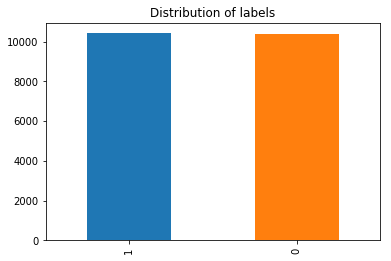

In [116]:
dataset['label'].value_counts().plot(kind='bar', title='Distribution of labels')

### 2 Getting real about Fake News | Kaggle
Link: [https://www.kaggle.com/mrisdal/fake-news](https://www.kaggle.com/mrisdal/fake-news)

The latest hot topic in the news is fake news and many are wondering what data scientists can do to detect it and stymie its viral spread. This dataset is only a first step in understanding and tackling this problem. It contains text and metadata scraped from 244 websites tagged as "bullshit" by the BS Detector Chrome Extension by Daniel Sieradski.

#### 2.0 Attributes
* **uuid** - unique identifier
* **ord_in_thread**
* **author** - author of story
* **published** - date published
* **title** - title of the story
* **text** - text of story
* **language** - data from webhose.io
* **crawled** - date the story was archived
* **site_url** - site URL from [BS detector](https://github.com/bs-detector/bs-detector/blob/dev/ext/data/data.json)
* **country** - data from webhose.io
* **domain_rank** - data from webhose.io
* **thread_title**
* **spam_score** - data from webhose.io
* **main_img_url** - image from story
* **replies_count** - number of replies
* **participants_count** - number of participants
* **likes** - number of Facebook likes
* **comments** - number of Facebook comments
* **shares** - number of Facebook shares
* **type** - type of website (label from [BS detector](https://github.com/bs-detector/bs-detector/blob/dev/ext/data/data.json))

#### 2.1 Read the data

In [117]:
# read data from dataset
dataset = pd.read_csv('data/kaggle_getting_real_about_fake_news/data.csv')

#### 2.2 Count of records

In [118]:
len(dataset)

12999

#### 2.3 Examples of the data
Check first 5 records:

In [119]:
dataset.head()

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,25689.0,BREAKING: Weiner Cooperating With FBI On Hilla...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,0,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01T15:46:26.304+02:00,100percentfedup.com,US,25689.0,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0.068,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,0,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,2016-11-01T23:59:42.266+02:00,100percentfedup.com,US,25689.0,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0.865,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias


Check last 5 records:

In [120]:
dataset.tail()

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
12994,f1b5d0e44803f48732bde854a9fdf95837219b12,2,replaceme,2016-10-26T23:58:00.000+03:00,NaN,It DOES allow you to put a dog face on top of ...,english,2016-10-27T00:37:46.194+03:00,zerohedge.com,US,2435.0,"Snapchat To Raise Up To $4 Billion In IPO, Val...",0.0,NaN,40,32,0,0,0,bs
12995,36011ceba3647e1bea78299b68b6fb705a1fc1ad,3,Freedumb,2016-10-27T00:02:00.000+03:00,NaN,Wait till you see what happens to the valuatio...,english,2016-10-27T00:37:46.220+03:00,zerohedge.com,US,2435.0,"Snapchat To Raise Up To $4 Billion In IPO, Val...",0.0,NaN,40,32,0,0,0,bs
12996,6995d1aa9ac99926106489b14b5530e85358059a,4,major major maj...,2016-10-27T00:06:00.000+03:00,NaN,I'm waiting for the one that puts a pussy on m...,english,2016-10-27T00:37:46.244+03:00,zerohedge.com,US,2435.0,"Snapchat To Raise Up To $4 Billion In IPO, Val...",0.0,NaN,40,32,0,0,0,bs
12997,7de8ae90eee164eb756db6c8a3772288e11d7a94,5,beemasters,2016-10-27T00:09:00.000+03:00,NaN,$4 Billion even after they are known to be kee...,english,2016-10-27T00:37:46.247+03:00,zerohedge.com,US,2435.0,"Snapchat To Raise Up To $4 Billion In IPO, Val...",0.0,NaN,40,32,0,0,0,bs
12998,dabef7095b7d9dae6eb0d83c4cbb40b85efd7ae5,6,i&#039;m-confused,2016-10-27T00:09:00.000+03:00,NaN,of course - how else would they disceminate te...,english,2016-10-27T00:37:46.260+03:00,zerohedge.com,US,2435.0,"Snapchat To Raise Up To $4 Billion In IPO, Val...",0.0,NaN,40,32,0,0,0,bs


#### 2.4 More information about the data
Check datatypes of columns in the data:

In [121]:
dataset.dtypes

uuid                   object
ord_in_thread           int64
author                 object
published              object
title                  object
text                   object
language               object
crawled                object
site_url               object
country                object
domain_rank           float64
thread_title           object
spam_score            float64
main_img_url           object
replies_count           int64
participants_count      int64
likes                   int64
comments                int64
shares                  int64
type                   object
dtype: object

Datatype 'object' means, that the data at that column contain string or other datatype, which can't be used in machine learning without other feature transformation.

In [122]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12999 entries, 0 to 12998
Data columns (total 20 columns):
uuid                  12999 non-null object
ord_in_thread         12999 non-null int64
author                10575 non-null object
published             12999 non-null object
title                 12319 non-null object
text                  12953 non-null object
language              12999 non-null object
crawled               12999 non-null object
site_url              12999 non-null object
country               12823 non-null object
domain_rank           8776 non-null float64
thread_title          12987 non-null object
spam_score            12999 non-null float64
main_img_url          9356 non-null object
replies_count         12999 non-null int64
participants_count    12999 non-null int64
likes                 12999 non-null int64
comments              12999 non-null int64
shares                12999 non-null int64
type                  12999 non-null object
dtypes: float64(2

Check some interesting values for each column:

In [123]:
dataset.describe(include='all')

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
count,12999,12999.000000,10575,12999,12319,12953,12999,12999,12999,12823,8776.000000,12987,12999.000000,9356,12999.000000,12999.000000,12999.000000,12999.000000,12999.000000,12999
unique,12999,NaN,2259,11973,11698,12431,16,12997,244,24,NaN,11788,NaN,7684,NaN,NaN,NaN,NaN,NaN,8
top,8bdec090e16f8d8d7d559376982acabfdbcfe538,NaN,admin,2016-10-27T03:00:00.000+03:00,Get Ready For Civil Unrest: Survey Finds That ...,,english,2016-11-08T01:28:01.428+02:00,pravdareport.com,US,NaN,WH Press Secretary Says Obama's Denial About C...,NaN,http://www.blacklistednews.com/images/blacklis...,NaN,NaN,NaN,NaN,NaN,bs
freq,1,NaN,247,59,7,106,12403,2,100,10367,NaN,44,NaN,100,NaN,NaN,NaN,NaN,NaN,11492
mean,NaN,0.891530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38092.996582,NaN,0.026122,NaN,1.383183,1.727518,10.831833,0.038311,10.831833,NaN
std,NaN,6.486822,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26825.487454,NaN,0.122889,NaN,9.656838,6.884239,79.798949,0.827335,79.798949,NaN
min,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,486.000000,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17423.000000,NaN,0.000000,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,NaN
50%,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34478.000000,NaN,0.000000,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,NaN
75%,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60570.000000,NaN,0.000000,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,NaN


#### 2.5 NULL values in the data
Are there any null values in our dataset?

In [124]:
dataset.isnull().values.any()

True

Look for the count of null values per column:

In [125]:
dataset.isnull().sum()

uuid                     0
ord_in_thread            0
author                2424
published                0
title                  680
text                    46
language                 0
crawled                  0
site_url                 0
country                176
domain_rank           4223
thread_title            12
spam_score               0
main_img_url          3643
replies_count            0
participants_count       0
likes                    0
comments                 0
shares                   0
type                     0
dtype: int64

#### 2.6 Looking at attributes

**Labels**

What is the distribution of news labels?

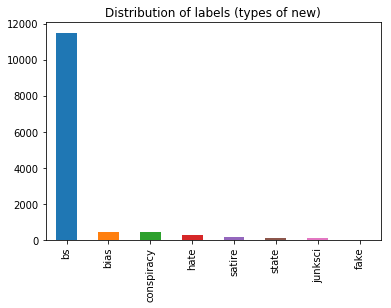

In [126]:
dataset.type.value_counts().plot(kind='bar', title='Distribution of labels (types of new)')

**Languages**

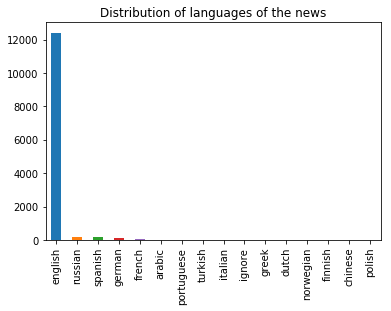

In [127]:
dataset.language.value_counts().plot(kind='bar', title='Distribution of languages of the news')

**Country**

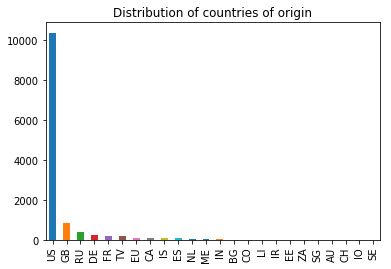

In [128]:
dataset.country.value_counts().plot(kind='bar', title='Distribution of countries of origin')

### 3 Fake News detection | Kaggle
Link: [https://www.kaggle.com/jruvika/fake-news-detection](https://www.kaggle.com/jruvika/fake-news-detection)

#### 3.0 Attributes
* **URLs** - url where new is available
* **Headline** - headline of the new article
* **Body** - body of the new message
* **Label** - label, whether is new fake or real

#### 3.1 Read the data

In [160]:
# read data from dataset
dataset = pd.read_csv('data/kaggle_fake_news_detection/data.csv')

#### 3.2 Count of records

In [161]:
len(dataset)

4009

#### 3.3 Examples of the data
Check first 5 records:

In [163]:
dataset.head()

,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1


Check last 5 records:

In [164]:
dataset.tail()

,URLs,Headline,Body,Label
4004,http://beforeitsnews.com/sports/2017/09/trends...,Trends to Watch,Trends to Watch\n% of readers think this story...,0
4005,http://beforeitsnews.com/u-s-politics/2017/10/...,Trump Jr. Is Soon To Give A 30-Minute Speech F...,Trump Jr. Is Soon To Give A 30-Minute Speech F...,0
4006,https://www.activistpost.com/2017/09/ron-paul-...,"Ron Paul on Trump, Anarchism & the AltRight",NaN,0
4007,https://www.reuters.com/article/us-china-pharm...,China to accept overseas trial data in bid to ...,SHANGHAI (Reuters) - China said it plans to ac...,1
4008,http://beforeitsnews.com/u-s-politics/2017/10/...,Vice President Mike Pence Leaves NFL Game Beca...,Vice President Mike Pence Leaves NFL Game Beca...,0


#### 3.4 More information about the data
Check datatypes of columns in the data:

In [165]:
dataset.dtypes

URLs        object
Headline    object
Body        object
Label        int64
dtype: object

Datatype 'object' means, that the data at that column contain string or other datatype, which can't be used in machine learning without other feature transformation.

In [166]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 4 columns):
URLs        4009 non-null object
Headline    4009 non-null object
Body        3988 non-null object
Label       4009 non-null int64
dtypes: int64(1), object(3)
memory usage: 125.4+ KB


Check some interesting values for each column:

In [167]:
dataset.describe(include='all')

,URLs,Headline,Body,Label
count,4009,4009,3988,4009.000000
unique,3352,2831,2863,NaN
top,http://beforeitsnews.com/u-s-politics/2017/10/...,"10/3 TRS-PNC Park Era: Bucs Win a Couple, Lose...",A Potato Battery Can Light up a Room for Over ...,NaN
freq,5,6,143,NaN
mean,NaN,NaN,NaN,0.466949
std,NaN,NaN,NaN,0.498969
min,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,1.000000


#### 3.5 NULL values in the data
Are there any null values in our dataset?

In [168]:
dataset.isnull().values.any()

True

Look for the count of null values per column:

In [169]:
dataset.isnull().sum()

URLs         0
Headline     0
Body        21
Label        0
dtype: int64

#### 3.6 Looking at attributes
What is the distribution of news labels?

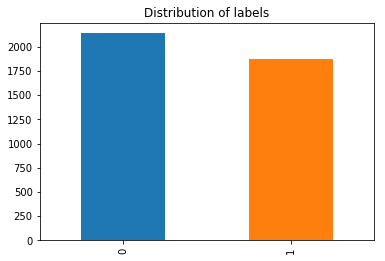

In [170]:
dataset['Label'].value_counts().plot(kind='bar', title='Distribution of labels')

### 4 GeorgeMcIntire/fake_real_news_dataset
Link: [https://github.com/GeorgeMcIntire/fake_real_news_dataset](https://github.com/GeorgeMcIntire/fake_real_news_dataset)



#### 4.0 Attributes

#### 4.1 Read the data

In [173]:
# read data from dataset
dataset = pd.read_csv('data/georgemcintire_fake_real_news_dataset/data.csv')

#### 4.2 Count of records

In [174]:
len(dataset)

6335

#### 4.3 Examples of the data
Check first 5 records:

In [175]:
dataset.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


Check last 5 records:

In [176]:
dataset.tail()

,Unnamed: 0,title,text,label
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL
6334,4330,Jeb Bush Is Suddenly Attacking Trump. Here's W...,Jeb Bush Is Suddenly Attacking Trump. Here's W...,REAL


#### 4.4 More information about the data
Check datatypes of columns in the data:

In [177]:
dataset.dtypes

Unnamed: 0     int64
title         object
text          object
label         object
dtype: object

Datatype 'object' means, that the data at that column contain string or other datatype, which can't be used in machine learning without other feature transformation.

In [178]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
Unnamed: 0    6335 non-null int64
title         6335 non-null object
text          6335 non-null object
label         6335 non-null object
dtypes: int64(1), object(3)
memory usage: 198.0+ KB


Check some interesting values for each column:

In [180]:
dataset.describe(include='all')

,Unnamed: 0,title,text,label
count,6335.000000,6335,6335,6335
unique,NaN,6256,6060,2
top,NaN,OnPolitics | 's politics blog,"Killing Obama administration rules, dismantlin...",REAL
freq,NaN,5,58,3171
mean,5280.415627,NaN,NaN,NaN
std,3038.503953,NaN,NaN,NaN
min,2.000000,NaN,NaN,NaN
25%,2674.500000,NaN,NaN,NaN
50%,5271.000000,NaN,NaN,NaN
75%,7901.000000,NaN,NaN,NaN


#### 4.5 NULL values in the data
Are there any null values in our dataset?

In [181]:
dataset.isnull().values.any()

False

There are no null values in this dataset.

### FakeNewsChallenge
Link: [https://github.com/FakeNewsChallenge/fnc-1](https://github.com/FakeNewsChallenge/fnc-1)

#### Analysis

In [1]:
# read data from dataset
dataset = pd.read_csv('data/fake_news_challenge/train_bodies.csv')

NameError: name 'pd' is not defined

### BuzzFeedNews Facebook Facts
Link: [https://github.com/BuzzFeedNews/2016-10-facebook-fact-check](https://github.com/BuzzFeedNews/2016-10-facebook-fact-check)

#### Analysis

In [46]:
# read data from dataset
dataset = pd.read_csv('data/buzzfeednews_facebook_facts/data.csv')

### LIAR
Link: [https://www.cs.ucsb.edu/~william/data/liar_dataset.zip](https://www.cs.ucsb.edu/~william/data/liar_dataset.zip)

### FakeNewsCorpus
Link: [https://github.com/several27/FakeNewsCorpus](https://github.com/several27/FakeNewsCorpus)